In [61]:
import pandas as pd
import extractor_parameter
import numpy as np
from datetime import datetime
import json
import csv

In [20]:
def read_EHR_file(path, file_type): 
    file = file_type + '.csv'
    df = pd.read_csv(path+file)
    df = df[extractor_parameter.files_colomn[file]]
    df = df.drop_duplicates()
    return df


In [21]:
path = f"C:/Users/yy/Desktop/synthea/output/csv/"
encounter_df =  read_EHR_file(path, 'encounters')
claim_df =  read_EHR_file(path, 'claims')
condition_df =  read_EHR_file(path, 'conditions')
encounter_df =  read_EHR_file(path, 'encounters')
careplan_df =  read_EHR_file(path, 'careplans')
patient_df =  read_EHR_file(path, 'patients')
observation_df =  read_EHR_file(path, 'observations')
procedure_df =  read_EHR_file(path, 'procedures')
allergy_df =  read_EHR_file(path, 'allergies')
imaging_studies_df =  read_EHR_file(path, 'imaging_studies')
supply_df =  read_EHR_file(path, 'supplies')
immunizations_df =  read_EHR_file(path, 'immunizations')
medication_df =  read_EHR_file(path, 'medications')
device_df =  read_EHR_file(path, 'devices')

# statistiques

In [31]:
# patient 

list_of_patients =  encounter_df['PATIENT'].unique()

print("total number of encounters: ", encounter_df['ENCOUNTER'].nunique())
print("total number of patients: ", encounter_df['PATIENT'].nunique())
print("average number of encounters per patient ", encounter_df['ENCOUNTER'].nunique()/encounter_df['PATIENT'].nunique())

num_patients = encounter_df['PATIENT'].nunique()
count_num_encounter_per_patient = np.zeros((num_patients, 1), dtype=int)


for i, patient in enumerate(list_of_patients):
    num_encounters = encounter_df[encounter_df['PATIENT'] == patient].shape[0]
    count_num_encounter_per_patient[i][0] = num_encounters

print("max number of encounters of 1 patient: ", max(count_num_encounter_per_patient))
print("min number of encounters of 1 patient: ", min(count_num_encounter_per_patient))



total number of encounters:  187932
total number of patients:  2303
average number of encounters per patient  81.60312635692576
max number of encounters of 1 patient:  [1024]
min number of encounters of 1 patient:  [1]


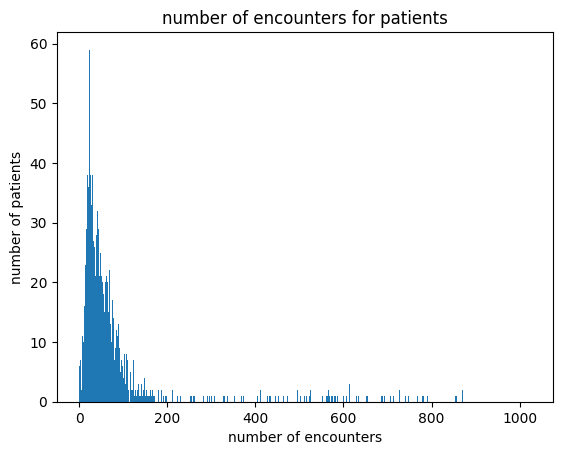

patients with less than number of 5 encounters:  17
patients with less than number of 10 encounters:  47


In [35]:
import matplotlib.pyplot as plt

plt.hist(count_num_encounter_per_patient,bins=1000)
plt.title("number of encounters for patients")
plt.xlabel('number of encounters')
plt.ylabel('number of patients')
plt.show()

print("patients with less than number of 5 encounters: ",np.sum(count_num_encounter_per_patient<5))
print("patients with less than number of 10 encounters: ",np.sum(count_num_encounter_per_patient<10))

# build vocabulary dicts and count frequency

In [118]:
def term_frequency_merge_col(df, col_name, file_type, var_name ):

    term_list = np.array(df[col_name].values.tolist()).flatten()
    cleaned_array = term_list[~np.isnan(term_list)]

    term_list = np.unique(cleaned_array)
    frequency = np.zeros((len(term_list)))

    for idx, term in enumerate(term_list): 
        frequency[idx] = np.sum(cleaned_array == term)
        
    combined_array = np.column_stack((term_list, frequency))
    
    csv_file_name = file_type + "_" + var_name + "_dict.csv"
    with open(csv_file_name, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Column1', 'Column2'])  # Write header
        csv_writer.writerows(combined_array)

    print(f"Data written to {csv_file_name}")
    
    return combined_array


In [111]:
def term_frequency(df, col_name, file_type):
    term_list = df[col_name].unique()
    frequency = np.zeros((len(term_list)))

    for idx, term in enumerate(term_list): 
        frequency[idx] = np.sum(df[col_name] == term)

    combined_array = np.column_stack((term_list, frequency))
    
    csv_file_name = file_type + "_" + col_name + "_dict.csv"
    with open(csv_file_name, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Column1', 'Column2'])  # Write header
        csv_writer.writerows(combined_array)

    print(f"Data written to {csv_file_name}")
    
    return combined_array


In [121]:
term_frequency_to_write = term_frequency(allergy_df, 'DESCRIPTION','allergy')

Data written to allergy_DESCRIPTION_dict.csv


In [120]:
terms_diag = ['DIAGNOSIS1','DIAGNOSIS2','DIAGNOSIS3','DIAGNOSIS4','DIAGNOSIS5','DIAGNOSIS6','DIAGNOSIS7','DIAGNOSIS8']
term_frequency_merge_col(claim_df, terms_diag,'claims','diagnosis')

Data written to claims_diagnosis_dict.csv


array([[1.73400600e+06, 4.00000000e+00],
       [3.71800100e+06, 5.90000000e+01],
       [4.55700300e+06, 5.00000000e+00],
       [5.60200100e+06, 7.60000000e+01],
       [6.07200700e+06, 1.40000000e+01],
       [6.52500200e+06, 3.15900000e+03],
       [7.20000200e+06, 1.00000000e+01],
       [1.05090020e+07, 2.69400000e+03],
       [1.47600080e+07, 1.00000000e+00],
       [1.57240050e+07, 3.00000000e+00],
       [1.57770000e+07, 9.08000000e+02],
       [1.58020040e+07, 1.00000000e+00],
       [1.61140010e+07, 1.20000000e+02],
       [1.91690020e+07, 3.66000000e+02],
       [2.22530000e+07, 1.00000000e+00],
       [2.22980060e+07, 1.24000000e+02],
       [2.40790010e+07, 9.30000000e+01],
       [2.50640020e+07, 1.90000000e+01],
       [2.56750040e+07, 6.89000000e+02],
       [2.69290040e+07, 1.92000000e+02],
       [2.79420050e+07, 7.00000000e+00],
       [3.08320010e+07, 3.00000000e+01],
       [3.29110000e+07, 8.30000000e+01],
       [3.37370010e+07, 6.80000000e+01],
       [3.387900

In [48]:
term_list_allergy

array(['Allergy to substance (finding)', 'Lisinopril',
       'Shellfish (substance)', 'Bee venom (substance)',
       'Mold (organism)', 'House dust mite (organism)',
       'Animal dander (substance)', 'Fish (substance)', 'Aspirin',
       'Ibuprofen', 'Tree pollen (substance)', 'Tree nut (substance)',
       'Peanut (substance)', 'Grass pollen (substance)',
       "Cow's milk (substance)", 'Penicillin V', 'Latex (substance)',
       'Soy bean', 'Wheat (substance)', 'Eggs (edible) (substance)',
       'Sulfamethoxazole / Trimethoprim', 'cefdinir'], dtype=object)